# A pool Car rental Management system

A person who has a plan to start a car rental business system in Goa, since Goa is tourist place, where most of peoples are comes here to enjoy their holiday from various regions of India and across the globe. For that the businessperson is approaching you to develop a Car Rental Management System in Python using Object Oriented Programming (OOP). This project should be seen easy design for the customer to access the features as hassle free. Also, administrator access is to be simple and dynamic in nature to update the key attributes of the functionality in this project.


In [ ]:
import datetime

class Car:
    def __init__(self, car_id, manufacturer, model, year, mileage, last_service_date, tariff, segment):
        self.car_id = car_id
        self.manufacturer = manufacturer
        self.model = model
        self.year = year
        self.mileage = mileage
        self.last_service_date = last_service_date
        self.tariff = tariff
        self.segment = segment
        self.available = True

    def is_service_due(self):
        today = datetime.date.today()
        last_service_age = today.year - self.last_service_date.year
        return last_service_age >= 1

class CarRentalSystem:
    def __init__(self):
        self.cars = []

    def add_car(self, car):
        self.cars.append(car)

    def rent_car(self, car_id, duration):
        for car in self.cars:
            if car.car_id == car_id and car.available:
                car.available = False
                rental_cost = car.tariff * duration
                return rental_cost
        return None

    def display_available_cars(self, segment=None):
        available_cars = [car for car in self.cars if car.available]
        if segment:
            available_cars = [car for car in available_cars if car.segment == segment]
        return available_cars

if __name__ == "__main__":
    rental_system = CarRentalSystem()

    car1 = Car(1, "Toyota", "Corolla", 2020, 10000, datetime.date(2023, 1, 1), 100, "Basic")
    car2 = Car(2, "BMW", "X5", 2021, 5000, datetime.date(2023, 2, 1), 200, "Luxury")

    rental_system.add_car(car1)
    rental_system.add_car(car2)

    car_id_to_rent = 1
    rental_duration = 5
    rental_cost = rental_system.rent_car(car_id_to_rent, rental_duration)

    if rental_cost is not None:
        print(f"Rental cost: {rental_cost} INR")
    else:
        print("Car not available or not found.")

    available_cars = rental_system.display_available_cars("Basic")
    print("Available Basic Cars:")
    for car in available_cars:
        print(f"Car ID: {car.car_id}, Manufacturer: {car.manufacturer}, Model: {car.model}")


Rental cost: 500 INR
Available Basic Cars:


# Railway Management System

• Problem Statement:

The problem statement is to create the Railway Management System that develops a user-friendly software application that facilitates various functionalities related to railway ticketing and management. The system should allow users to book tickets, cancel booking, check fares, view their bookings, and display available trains.


In [ ]:
class Train:
    def __init__(self, train_id, name, source, destination, departure_time, arrival_time, seats_available, fare):
        self.train_id = train_id
        self.name = name
        self.source = source
        self.destination = destination
        self.departure_time = departure_time
        self.arrival_time = arrival_time
        self.seats_available = seats_available
        self.fare = fare

class Booking:
    def __init__(self, booking_id, train, class_type, travel_date):
        self.booking_id = booking_id
        self.train = train
        self.class_type = class_type
        self.travel_date = travel_date

class RailwaySystem:
    def __init__(self):
        self.trains = []
        self.bookings = []
        self.booking_counter = 1

    def add_train(self, train):
        self.trains.append(train)

    def book_ticket(self, train_id, class_type, travel_date):
        for train in self.trains:
            if train.train_id == train_id:
                if train.seats_available > 0:
                    booking = Booking(self.booking_counter, train, class_type, travel_date)
                    self.bookings.append(booking)
                    train.seats_available -= 1
                    self.booking_counter += 1
                    return f"Booking successful. Booking ID: {booking.booking_id}"
                else:
                    return "Sorry, no seats available for this train."
        return "Train not found."

    def cancel_booking(self, booking_id):
        for booking in self.bookings:
            if booking.booking_id == booking_id:
                booking.train.seats_available += 1
                self.bookings.remove(booking)
                return "Booking canceled successfully."
        return "Booking not found."

    def check_fare(self, train_id, class_type):
        for train in self.trains:
            if train.train_id == train_id:
                if class_type.lower() == "first class":
                    return f"Fare for {train.name} ({class_type}): {train.fare * 2}"
                elif class_type.lower() == "second class":
                    return f"Fare for {train.name} ({class_type}): {train.fare}"
        return "Train not found."

    def view_bookings(self):
        if not self.bookings:
            return "No bookings found."
        else:
            booking_details = []
            for booking in self.bookings:
                booking_details.append(f"Booking ID: {booking.booking_id}, Train: {booking.train.name}, "
                                       f"Class: {booking.class_type}, Travel Date: {booking.travel_date}")
            return "\n".join(booking_details)

    def check_train_availability(self, source, destination):
        available_trains = []
        for train in self.trains:
            if train.source.lower() == source.lower() and train.destination.lower() == destination.lower():
                available_trains.append(train)
        if not available_trains:
            return "No trains available for this route."
        else:
            train_details = []
            for train in available_trains:
                train_details.append(f"Train: {train.name}, Departure Time: {train.departure_time}, "
                                     f"Arrival Time: {train.arrival_time}, Seats Available: {train.seats_available}")
            return "\n".join(train_details)

if __name__ == "__main__":
    railway_system = RailwaySystem()

    train1 = Train(1, "Express", "A", "B", "09:00 AM", "12:00 PM", 50, 500)
    train2 = Train(2, "Local", "B", "C", "02:00 PM", "05:00 PM", 100, 200)
    railway_system.add_train(train1)
    railway_system.add_train(train2)

    while True:
        print("\nRailway Management System Menu:")
        print("1. Book a Ticket")
        print("2. Cancel Booking")
        print("3. Check Fare")
        print("4. View Bookings")
        print("5. Check Train Availability")
        print("6. Exit")

        choice = input("Enter your choice: ")

        if choice == "1":
            train_id = int(input("Enter Train ID: "))
            class_type = input("Enter Class (First Class/Second Class): ")
            travel_date = input("Enter Travel Date (YYYY-MM-DD): ")
            result = railway_system.book_ticket(train_id, class_type, travel_date)
            print(result)

        elif choice == "2":
            booking_id = int(input("Enter Booking ID: "))
            result = railway_system.cancel_booking(booking_id)
            print(result)

        elif choice == "3":
            train_id = int(input("Enter Train ID: "))
            class_type = input("Enter Class (First Class/Second Class): ")
            result = railway_system.check_fare(train_id, class_type)
            print(result)

        elif choice == "4":
            bookings = railway_system.view_bookings()
            print(bookings)

        elif choice == "5":
            source = input("Enter Source Station: ")
            destination = input("Enter Destination Station: ")
            trains = railway_system.check_train_availability(source, destination)
            print(trains)

        elif choice == "6":
            print("Thank you for using the Railway Management System!")
            break

        else:
            print("Invalid choice. Please try again.")



Railway Management System Menu:
1. Book a Ticket
2. Cancel Booking
3. Check Fare
4. View Bookings
5. Check Train Availability
6. Exit
Enter your choice: 4
No bookings found.

Railway Management System Menu:
1. Book a Ticket
2. Cancel Booking
3. Check Fare
4. View Bookings
5. Check Train Availability
6. Exit
Enter your choice: 6
Thank you for using the Railway Management System!


# YouTube Video Statistics

Abstract:

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, to determine the year's top- trending videos, YouTube uses a combination of factors including measuring user's interactions (number of views, shares, comments, and likes). Note: that they're not the most-viewed videos overall for the calendar year.

     Video_id category_id          channel_title  subscriber  \
0   HDR9SQc79          22           CaseyNeistat   9086142.0   
1  KNH52UF?48          24        LastWeekTonight   5937292.0   
2  QTW28IRG36          23           Rudy Mancuso   4191209.0   
3  MGL76WI]26          24  Good Mythical Morning  13186408.0   
4  TWP93KXT70          24               nigahiga  20563106.0   

                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                                tags  \
0                                    SHANtell martin   
1  last week tonight trump presidency|last week t...   
2  racist superman|rudy|mancuso|king|bach|racist|...   
3  rhett and link|gmm|good mythical morning|rhett...  

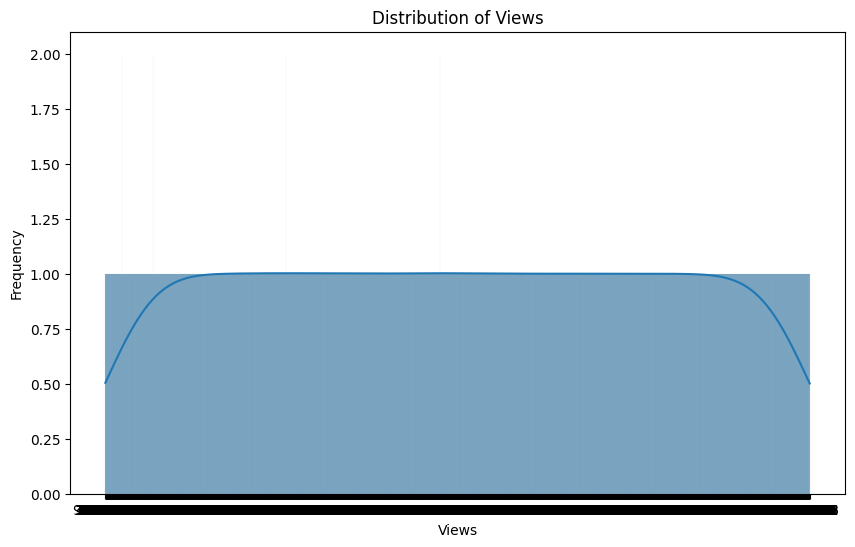

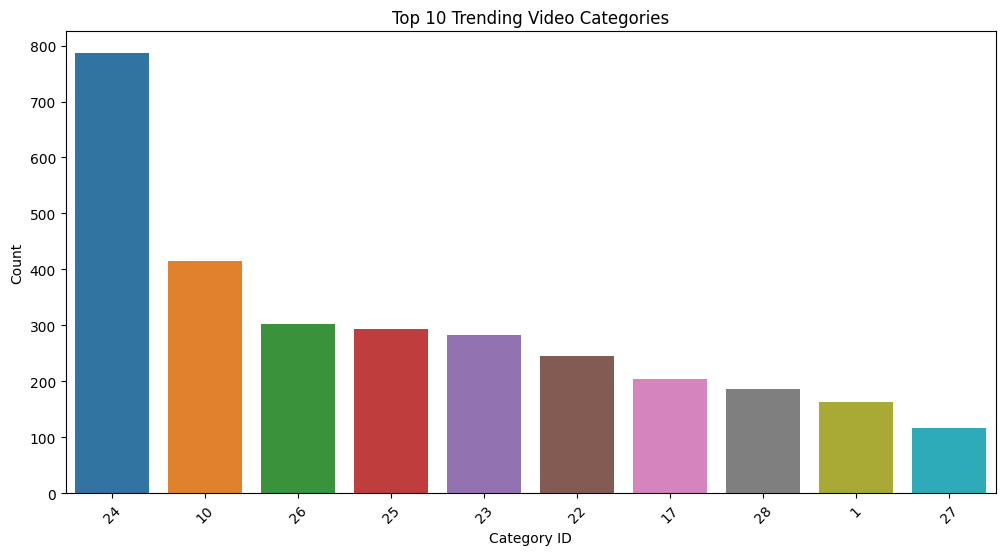

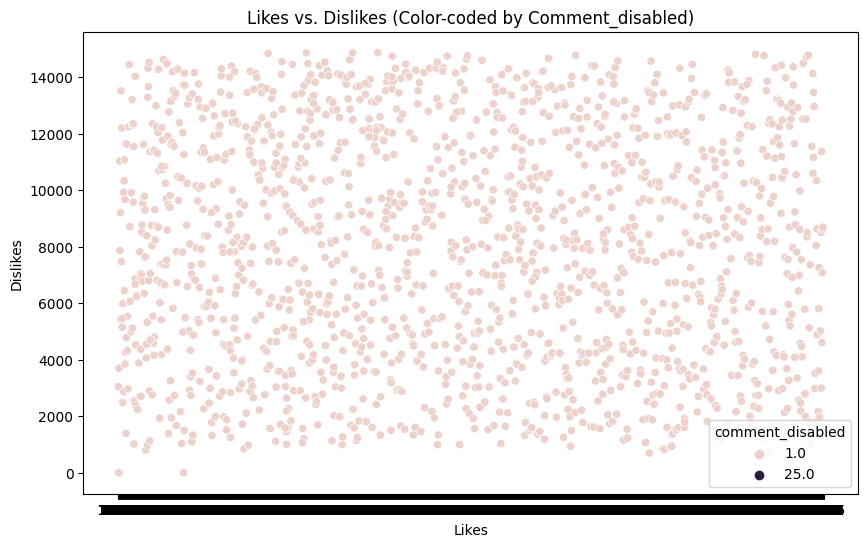

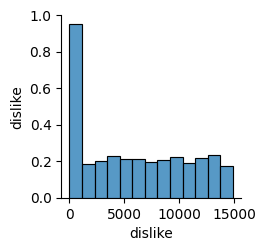

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

youtube_data = pd.read_csv('/content/youtube.csv')

print(youtube_data.head())

print(youtube_data.describe())

print(youtube_data.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(youtube_data['views'], bins=50, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

top_categories = youtube_data['category_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Trending Video Categories')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=youtube_data, x='likes', y='dislike', hue='comment_disabled')
plt.title('Likes vs. Dislikes (Color-coded by Comment_disabled)')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()

sns.pairplot(data=youtube_data[['views', 'likes', 'dislike', 'comment_count']])
plt.show()
